In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import flare_prob
import toymodel
import LSSToy

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
files= np.loadtxt('trilegal_models/cluster_index.txt', comments='#', unpack=True, 
                         usecols=(0,), dtype='str')

In [3]:
# compute the densities of GKM stars 
l, b, r2, mvG2, mvK0, mvM0, nG, nK, nM, dist = np.loadtxt('trilegal_models/cluster_index.txt', comments='#', 
                                                          unpack=True, dtype='float', usecols=(1,2,3,4,5,6,7,8,9,10))

fov = 0.1 # sq deg
Teff_bins = np.log10(np.arange(3000,8000,1000))
clrs = ['crimson','darkorange','cornflowerblue']

ddist = 250.

(15, 28)

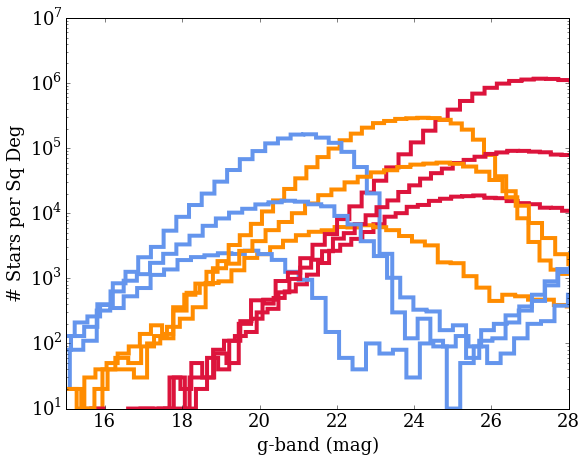

In [14]:
nG_f = np.zeros_like(nG)
nK_f = np.zeros_like(nK)
nM_f = np.zeros_like(nM)

plt.figure(figsize=(9,7))
for j in range(len(files)):
    file = 'trilegal_models/' + files[j]
    df = pd.read_table(file, sep=r"\s*", engine='python')

    # get densities of GKM stars in each field, compute total # of GKM field stars within r2 radius
    for k in range(len(Teff_bins)-2):
        x = np.where((df['logg'] >= 4) & (df['logTe'] >= Teff_bins[k]) & (df['logTe'] < Teff_bins[k+1]))
        _ = plt.hist(df['g'].values[x], bins=50, color=clrs[k], histtype='step', lw=4, 
                     weights=np.ones(len(x[0])) / fov)

    dist_c = 10.**(df['m-M0'].values/5. + 1.)
    # within each temp bin for this cluster, count # of stars inside magnitude range of cluster (distance)
    x = np.where((df['logg'] >= 4) & (df['logTe'] >= Teff_bins[2]) & (df['logTe'] < Teff_bins[2+1]) & 
                 (dist_c >= dist[j]-ddist) & (dist_c <= dist[j]+ddist))
    nG_f[j] = len(x[0]) / fov * np.pi * r2[j]**2.

    x = np.where((df['logg'] >= 4) & (df['logTe'] >= Teff_bins[1]) & (df['logTe'] < Teff_bins[1+1]) & 
                 (dist_c >= dist[j]-ddist) & (dist_c <= dist[j]+ddist))
    nK_f[j] = len(x[0]) / fov * np.pi * r2[j]**2.

    x = np.where((df['logg'] >= 4) & (df['logTe'] >= Teff_bins[0]) & (df['logTe'] < Teff_bins[0+1]) & 
                 (dist_c >= dist[j]-ddist) & (dist_c <= dist[j]+ddist))
    nM_f[j] = len(x[0]) / fov * np.pi * r2[j]**2.

    
plt.yscale('log')
plt.xlabel('g-band (mag)')
plt.ylabel('# Stars per Sq Deg')
plt.xlim(15,28)

In [17]:
for k in range(len(files)):
    print(files[k], nG[k],nG_f[k], nK[k],nK_f[k], nM[k],nM_f[k] )

('NGC_2477.dat', 90.0, 162.86016316209486, 240.0, 401.72173579983405, 1650.0, 2068.3240721586048)
('NGC_5316.dat', 90.0, 208.12423011501664, 240.0, 575.52720776703586, 1650.0, 2731.0995911011369)
('IC_4651.dat', 75.0, 260.8307300642926, 215.0, 769.76873994583912, 1500.0, 4198.738581522759)


In [16]:
for k in range(len(files)):
    print(files[k], nG[k]/nG_f[k], nK[k]/nK_f[k], nM[k]/nM_f[k] )

('NGC_2477.dat', 0.55262133018019222, 0.59742846505966718, 0.79774732703177353)
('NGC_5316.dat', 0.43243403206951392, 0.41700895589483256, 0.60415226357041985)
('IC_4651.dat', 0.28754280594741705, 0.27930466495057643, 0.35725015284376055)


(28, 15)

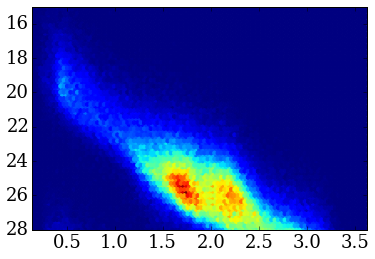

In [13]:
x = np.where((df['logg'] >= 4) & (df['logTe'] >= Teff_bins[0]) & (df['logTe'] < Teff_bins[4]))
plt.hexbin(df['g'].values[x] - df['i'].values[x], df['g'].values[x])
plt.ylim(28,15)
